## - 불러올 패키지 목록

In [2]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [3]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## data 정보 확인

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# x값(예측변수), y값(목표변수) 설정

In [5]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , 0:4 ]
y = df_iris.iloc[:, 4 ]

In [6]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
y2 = pd.get_dummies(y)
y2

,setosa,versicolor,virginica
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
146,0,0,1
147,0,0,1
148,0,0,1
149,0,0,1


In [8]:
# df_iris.data = df_iris.loc[ : , 'Sepal.Length':'Petal.Width' ] .values
# df_iris.feature_names = list( df_iris.drop('Species', axis=1) )

# df_iris.target = df_iris['Species']
# df_iris.target_names = list( df_iris['Species'].unique() )

# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y2,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

TypeError: unhashable type: 'numpy.ndarray'

# 모델 생성 및 학습

## 결정나무 모델 생성
- `sklearn.tree.DecisionTreeClassifier()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [11]:
# 의사결정트리 만들기
model_dtclf = DecisionTreeClassifier( random_state = 153 )

## train 데이터로 학습 수행
- `.fit()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

In [12]:
# 모델 학습
model_dtclf.fit( x_train, y_train )

DecisionTreeClassifier(random_state=153)

In [13]:
# 모델의 정답에 대한 정보 확인
model_dtclf.classes_

[array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8)]

# 예측 및 평가

## 학습된 모델로 예측 수행
- `.predict()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

In [14]:
# 새로운 테스트 데이터로 예측하기
model_dtclf.predict( [ [5.1, 3.5, 4.0, 0.2] ] )

array([[1, 0, 0]], dtype=uint8)

In [15]:
# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )

accuracy_score(y_test, y_pred)



0.9333333333333333

## 평가

### Confusion Metrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [29]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

ValueError: Data must be 1-dimensional

In [31]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[30,  0],
        [ 0, 15]],

       [[30,  2],
        [ 1, 12]],

       [[27,  1],
        [ 2, 15]]], dtype=int64)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(
    multilabel_confusion_matrix(y_test, y_pred), 
    annot=True, 
    cbar=False, 
    fmt='3d', 
    cmap='Blues', 
    ax=ax
)

ValueError: Must pass 2-d input. shape=(3, 2, 2)

### 분석 지표
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score

- `sklearn.metrics.accuracy_score()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()` https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [31]:
y_score = model_dtclf.fit(x_train, y_train).decision_function(x_test)
y_score

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [30]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9333333333333333

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.857     0.923     0.889        13
           2      0.938     0.882     0.909        17

   micro avg      0.933     0.933     0.933        45
   macro avg      0.932     0.935     0.933        45
weighted avg      0.935     0.933     0.934        45
 samples avg      0.933     0.933     0.933        45




### [미해결: 다중클래스에 대한 ROC, 사이킷런 가이드의 결과와 다르게 나옴] ROC curve / AUC
- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
- 
- [참고!] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [32]:
y_test_1

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0])

In [36]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_1 = np.where( y_test == 'setosa', 1, 0 )
y_pred_1 = np.where( y_pred == 'setosa', 1, 0 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# Accuracy
acc = model_dtclf.score( y_test_1.reshape(-1, 1), y_pred_1.reshape(-1, 1) )
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_1, y_pred_1 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_1, y_pred_1,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

ValueError: X has 1 features, but DecisionTreeClassifier is expecting 4 features as input.

In [30]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화

y_test_2 = np.where( y_test == 'versicolor', 1, 0 )
y_pred_2 = np.where( y_pred == 'versicolor', 1, 0 )

# Accuracy
acc = model_dtclf.score( x_test_2, y_test_2 )
print('Accuracy: ', acc )

# AUC 계산
auc = roc_auc_score( y_test_2, y_pred_2 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_2, y_pred_2,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

NameError: name 'x_test_2' is not defined

AUC:  0.9233193277310925



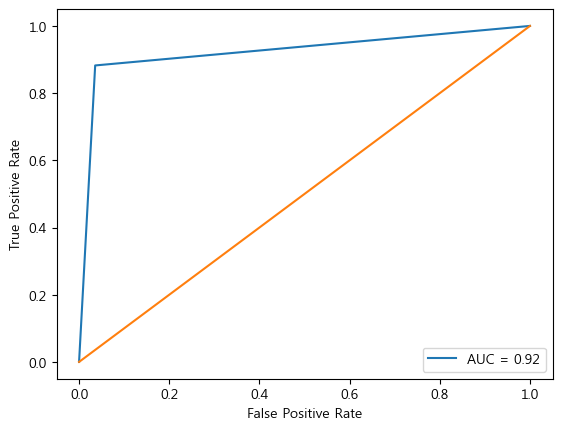

In [17]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
y_test_3 = np.where( y_test == 'virginica', 1, 0 )
y_pred_3 = np.where( y_pred == 'virginica', 1, 0 )

# AUC 계산
auc = roc_auc_score( y_test_3, y_pred_3 )
print('AUC: ', auc )
print()

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test_3, y_pred_3,
                                  pos_label = 1)

RocCurveDisplay( fpr, tpr).plot()
plt.legend( labels = ['AUC = %.2f' % auc],
            loc = 'lower right')

plt.plot( [0,1], [0,1] )

plt.show()

# 시각화

## 결정나무 시각화
- `sklearn.tree.plot_tree()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

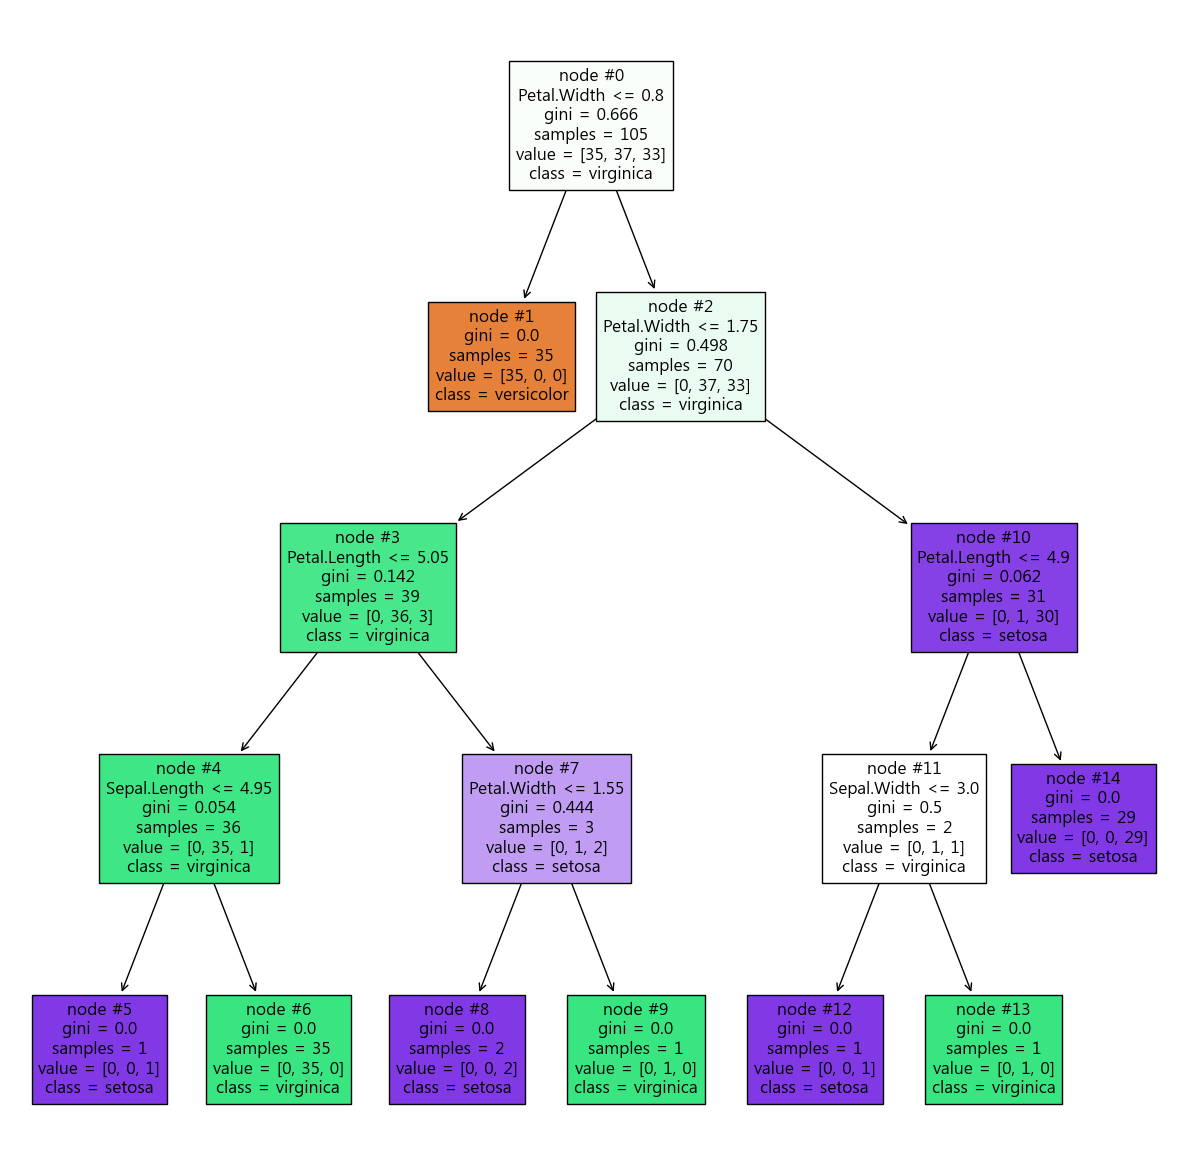

In [18]:
plt.figure( figsize=(15, 15) )

plot_tree( model_dtclf,
           class_names = y_train.unique(),
           feature_names = x_train.columns,
           filled = True,
           node_ids = True )

plt.show()

## 결정나무를 텍스트 형식으로 출력
- `sklearn.tree.export_text()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

In [19]:
tree_text = export_text( model_dtclf )

print( tree_text )

|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.90
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.90
|   |   |   |--- class: virginica



## 입력변수들의 중요도 확인(확률값)
- `.feature_importances_`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_

        feature  importance
0  Sepal.Length    0.027808
1   Sepal.Width    0.014301
2  Petal.Length    0.045709
3   Petal.Width    0.912181



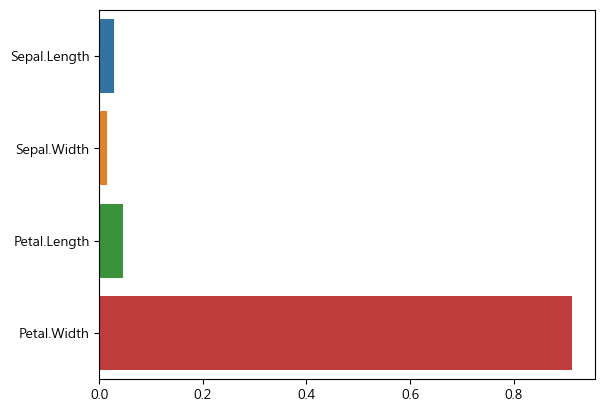

In [20]:
# 입력변수들의 중요도 확인(확률값)

ft_impt = pd.DataFrame( {'feature' : x_train.columns,
                         'importance' : model_dtclf.feature_importances_} )

print( ft_impt )
print()

sb.barplot( x = model_dtclf.feature_importances_,
            y = list( df_iris.drop('Species', axis=1) ) )
plt.show()

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`
- 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### 파라미터 확인 및 평가 조건 설정
- `get_params()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [21]:
# 파라미터 목록 확인
list( model_dtclf.get_params().keys() )

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [22]:
# 평가할 파라미터 split 조건 설정

params = { 'max_depth' : [3, 4, 5],
           'min_samples_split' : [1, 2, 3, 4, 5],
           'min_samples_leaf' : [1, 2, 3, 4, 5] }

grid = GridSearchCV( model_dtclf,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy')

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=153),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [23]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            75 non-null     float64
 1   std_fit_time             75 non-null     float64
 2   mean_score_time          75 non-null     float64
 3   std_score_time           75 non-null     float64
 4   param_max_depth          75 non-null     object 
 5   param_min_samples_leaf   75 non-null     object 
 6   param_min_samples_split  75 non-null     object 
 7   params                   75 non-null     object 
 8   split0_test_score        60 non-null     float64
 9   split1_test_score        60 non-null     float64
 10  split2_test_score        60 non-null     float64
 11  split3_test_score        60 non-null     float64
 12  split4_test_score        60 non-null     float64
 13  split5_test_score        60 non-null     float64
 14  split6_test_score        60 

In [24]:
pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','rank_test_score'] ].sort_values(['rank_test_score']).head(30)

,params,mean_test_score,rank_test_score
37,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}",0.966667,1
36,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.966667,1
64,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.966667,1
63,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.966667,1
62,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}",0.966667,1
61,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.966667,1
38,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}",0.966667,1
39,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.966667,1
14,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}",0.966667,1
11,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}",0.966667,1


### 최적의 파라미터 추출
- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [25]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.9667
최적 Parameters:  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
최적 Estimators:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=153)


In [26]:
print(C)

NameError: name 'C' is not defined

## 최적 Parameter 조건으로 모델 생성 및 학습

In [ ]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( max_depth=3,
                                      random_state=153 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

## 최적화된 모델로 예측 수행
- `.predict()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

In [ ]:
# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )
print()

In [ ]:
# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = y_train.unique(),
           feature_names = x_train.columns,
           filled = True,
           node_ids = True )
plt.show()

### 최적화된 모델의 입력변수들의 중요도 확인(확률값)
- `.feature_importances_`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# 입력변수들의 중요도 확인(확률값)

ft_impt = pd.DataFrame( {'feature' : x_train.columns,
                         'importance' : model_dtclf.feature_importances_} )

print( ft_impt )
print()

sb.barplot( x = model_dtclf.feature_importances_,
            y = list( df_iris.drop('Species', axis=1) ) )
plt.show()

In [ ]:
# max_depth 에 따른 평가결과 차이 확인
plt.scatter( df_grid['param_max_depth'], df_grid['mean_test_score'] )
plt.xlabel( 'param_max_depth' )
plt.ylabel( 'mean_test_score' )
plt.show()

In [ ]:
# min_samples_leaf 에 따른 평가결과 차이 확인
plt.scatter( df_grid['param_min_samples_leaf'], df_grid['mean_test_score'] )
plt.xlabel( 'param_min_samples_leaf' )
plt.ylabel( 'mean_test_score' )
plt.show()

In [ ]:
# min_samples_split 에 따른 평가결과 차이 확인
plt.scatter( df_grid['param_min_samples_split'], df_grid['mean_test_score'] )
plt.xlabel( 'param_min_samples_split' )
plt.ylabel( 'mean_test_score' )
plt.show()

## 최적화 모델 평가

### Confusion Metrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )

### 분석 지표
- `sklearn.metrics.accuracy_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Accuracy
model_dtclf.score( x_test, y_test )

In [ ]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

### 데이터별 예측 확률
- `.predict_proba()`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba

In [ ]:
proba = model_dtclf.predict_proba(x_test)

df_proba = pd.DataFrame( proba, columns = model_dtclf.classes_ )

df_proba.head()

### ROC curve / AUC
- `sklearn.metrics.roc_curve()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
# 'setosa' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_1 = y_test.apply(lambda x: 1 if 'setosa' == x else 0 )

# 'sotosa' 에 대한 proba 추출'
proba_1 = df_proba['setosa']

# AUC 계산
print('AUC: ', roc_auc_score( result_1, proba_1 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_1,
                                  pos_label='setosa')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
# 'versicolor' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_2 = y_test.apply(lambda x: 1 if 'versicolor' == x else 0 )

# 'versicolor' 에 대한 proba 추출'
proba_2 = df_proba['versicolor']

# AUC 계산
print('AUC: ', roc_auc_score( result_2, proba_2 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_2,
                                  pos_label='versicolor')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_3 = y_test.apply(lambda x: 1 if 'virginica' == x else 0 )

# 'virginica' 에 대한 proba 추출'
proba_3 = df_proba['virginica']

# AUC 계산
print('AUC: ', roc_auc_score( result_3, proba_3 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_3,
                                  pos_label='virginica')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
pd.DataFrame( {'setosa':result_1,
               'proba_1':proba_1,
               'versicolor':result_2,
               'proba_2':proba_2,
               'virginica':result_3,
               'proba_3':proba_3} ).head()

# [참고] 결정나무의 Parameters
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## 결정나무의 최대 깊이 제어
- `sklearn.tree.DecisionTreeClassifier( max_depth = int, default=None )`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( max_depth = 3,
                                      random_state = 156 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = df_iris['Species'].unique(),
           feature_names = list(df_iris.drop('Species', axis =1)),
           filled = True,
           node_ids = True )
plt.show()

## 자식노드를 생성하기 위한 최소 데이터 개수 설정
- `sklearn.tree.DecisionTreeClassifier( min_samples_split = int or float, default=2 )`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( min_samples_split = 3,
                                      random_state = 156 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = df_iris['Species'].unique(),
           feature_names = list(df_iris.drop('Species', axis =1)),
           filled = True,
           node_ids = True )
plt.show()

## 리프 노드가 될 수 있는 최소 데이터 개수 설정
- `sklearn.tree.DecisionTreeClassifier( min_samples_leaf = int or float, default=1 )`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# 의사결정트리 생성
model_dtclf = DecisionTreeClassifier( min_samples_leaf = 2,
                                      random_state = 156 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )
print( 'Accuracy:', accuracy_score(y_test, y_pred) )

# 시각화
plt.figure( figsize=(15, 15) )
plot_tree( model_dtclf,
           class_names = df_iris['Species'].unique(),
           feature_names = list(df_iris.drop('Species', axis =1)),
           filled = True,
           node_ids = True )
plt.show()

# [참고] 결정나무의 과적합 여부 확인

In [ ]:
# 2차원 시각화를 위해 두 개의 독립변수만 사용
x2 = df_iris.iloc[:, [2, 3] ]
y2 = df_iris.iloc[:,4]

In [ ]:
encoder = LabelEncoder()
encoder.fit(y2)

labels = encoder.transform(y2)
y2 = labels

In [ ]:
y2

In [ ]:
# 데이터셋 나누기
x2_train, x2_test, y2_train, y2_test  = train_test_split( x2, y2,
                                                          test_size = 0.30,
                                                          random_state = 153 )

In [ ]:
# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter( x2_train['Petal.Length'], x2_train['Petal.Width'],
             marker='o',
             c = y2_train,
             s = 25,
             cmap='rainbow',
             edgecolor='k')
plt.show()

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(x2_train['Petal.Length'], x2_train['Petal.Width'], c=y2_train, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [ ]:
# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(random_state=153).fit(x2_train, y2_train)

visualize_boundary(dt_clf, x2_train, y2_train)

In [ ]:
# 하이퍼 파라미터 최적화 결과를 적용한 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=153).fit(x2_train, y2_train)

visualize_boundary(dt_clf, x2_train, y2_train)